<a href="https://colab.research.google.com/github/AyeshaIjazTabassum/PythonAIBootcamp/blob/main/Day6.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas
Pandas  is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series.
# Statistics
it is a field of math that deals with the collection, analysis interpretation, presentation and oganization of data.
# Descriptive statistics
Mean, median, mode, range, standard deviation and variance.
# Inferential statistics
hypothesis testing, confidence intervals, p-value, T-test\ ANOVA test and regression analysis.
# Probability Distribution
Normal distribution , Binomial Distribution and poisson distribution.

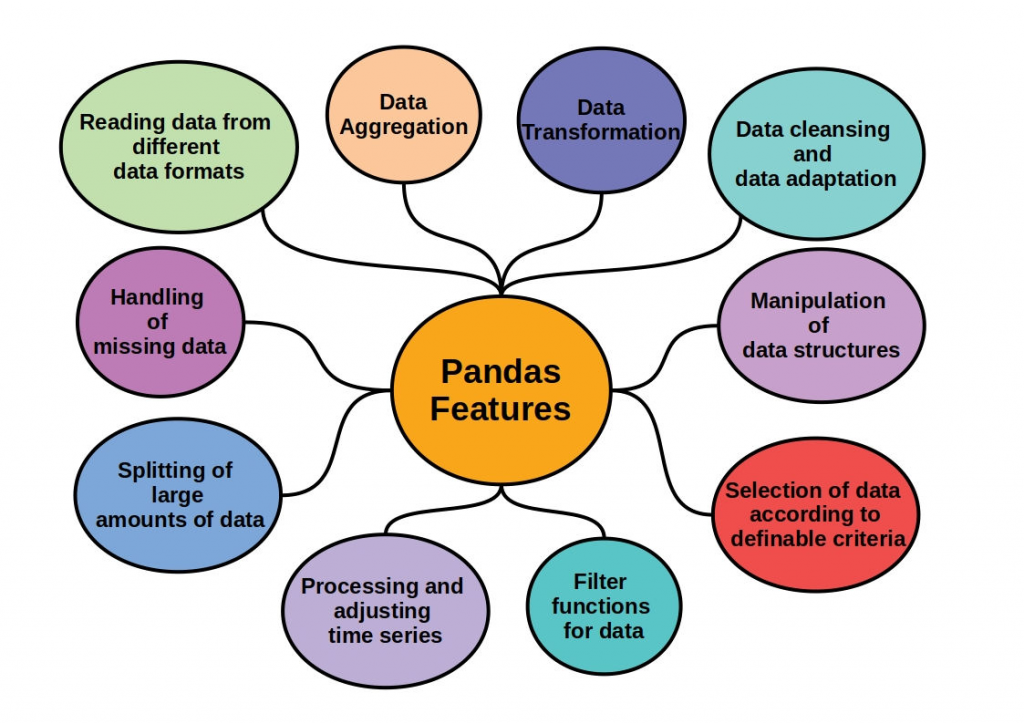

# Pandas Main Data Structures
1. DataFrame  
2. Series

# Series
A Series is a one-dimensional labeled array.

Think of it like a single column in a table (like an Excel column).

It has two main components:

Index (row labels)

Values (data)

In [1]:
import pandas as pd

a = pd.Series([10, 20, 30], index=['a', 'b', 'c'])
a


,0
a,10
b,20
c,30


# 🧾 DataFrame
A DataFrame is a two-dimensional labeled data structure.

It’s like a table with rows and columns, or a collection of Series sharing the same index.

In [14]:
data = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35]
}

df = pd.DataFrame(data)
print(df)


      Name  Age
0    Alice   25
1      Bob   30
2  Charlie   35


In [3]:
data

{'Name': ['Alice', 'Bob', 'Charlie'], 'Age': [25, 30, 35]}

In [4]:
type(data)

dict

In [5]:
df

,Name,Age
0,Alice,25
1,Bob,30
2,Charlie,35


In [6]:
type(df)

pandas.core.frame.DataFrame

#  import different types of files using pandas in Python

In [8]:
# ✅ read_csv() is used for importing CSV (Comma-Separated Values) files.

import pandas as pd

df = pd.read_csv('/content/heart.csv')

In [15]:
df.head()

,Name,Age
0,Alice,25
1,Bob,30
2,Charlie,35


In [11]:
# ✅ read_excel() is used for Excel files. You can also specify a sheet name if needed.
import pandas as pd
df = pd.read_excel('file_name.xlsx', sheet_name='Sheet1')


In [12]:
# ✅ You can use read_csv() with a delimiter argument for custom separators.
import pandas as pd
df = pd.read_csv('file_name.txt', delimiter='\t')  # For tab-separated


In [13]:
# ✅ read_json() is used to read data from a JSON (JavaScript Object Notation)file.
import pandas as pd
df = pd.read_json('file_name.json')


In [16]:
import pandas as pd
import numpy as np

# For reproducibility
np.random.seed(42)

n = 100

# 1) Generate columns
genders  = np.random.choice(['Male', 'Female'], size=n)
cities   = np.random.choice(['Lahore', 'Karachi', 'Islamabad', 'Peshawar', 'Quetta'], size=n)
subjects = np.random.choice(['Math', 'English', 'Physics', 'Chemistry', 'Biology'], size=n)
marks    = np.random.normal(loc=60, scale=20, size=n)  # around 70±10

# 2) Inject a few extreme outliers
out_idx = np.random.choice(n, size=3, replace=False)
marks[out_idx] = [150, -20, 130]  # two high outliers and one negative

# 3) Admission status
admission = np.where(np.random.rand(n) > 0.7, 'Yes', 'No')

# 4) Assemble into DataFrame
df = pd.DataFrame({
    'Gender'   : genders,
    'City'     : cities,
    'Marks'    : marks,
    'Subject'  : subjects,
    'Admission': admission
})

# 5) Randomly introduce ~5% missing values per column
for col in df.columns:
    missing_count = int(0.07 * n)
    missing_indices = np.random.choice(df.index, size=missing_count, replace=False)
    df.loc[missing_indices, col] = np.nan

# 6) Inspect the first few rows
print(df.head())


   Gender      City      Marks    Subject Admission
0    Male   Karachi  74.690021        NaN        No
1  Female   Karachi  40.910055    Physics       Yes
2    Male  Peshawar  44.976412        NaN       Yes
3    Male   Karachi  37.391439  Chemistry       NaN
4    Male   Karachi  75.399547    Physics        No


In [17]:
df

,Gender,City,Marks,Subject,Admission
0,Male,Karachi,74.690021,NaN,No
1,Female,Karachi,40.910055,Physics,Yes
2,Male,Peshawar,44.976412,NaN,Yes
3,Male,Karachi,37.391439,Chemistry,NaN
4,Male,Karachi,75.399547,Physics,No
...,...,...,...,...,...
95,Female,Lahore,34.401605,English,Yes
96,NaN,NaN,55.252161,English,No
97,Female,Islamabad,97.440114,English,NaN
98,Female,Lahore,59.611157,Physics,No


In [18]:
df.columns

Index(['Gender', 'City', 'Marks', 'Subject', 'Admission'], dtype='object')

# Pre-processing and EDA (Exploratory Data Analysis) are not the same thing, although they are related and often performed together in the data analysis process.

# Pre-processing:
Pre-processing involves cleaning, transforming, and preparing the data for analysis. This step includes:

1. Handling missing values
2. Data normalization
3. Feature scaling
4. Removing outliers

# EDA (Exploratory Data Analysis):
EDA is the process of exploring and understanding the underlying structure and patterns in the data. This step includes:

1. Visualizing data distributions
2. Identifying relationships between variables
3. Detecting outliers and anomalies
4. Gaining insights into the data

While pre-processing prepares the data for analysis, EDA helps you understand the data and identify potential issues or opportunities.

# 1 Pre-processing:
Pre-processing involves cleaning, transforming, and preparing the data for analysis. This step includes:

1. Handling missing values
2. Data normalization
3. Feature scaling
4. Removing outliers

In [19]:
df.head()

,Gender,City,Marks,Subject,Admission
0,Male,Karachi,74.690021,NaN,No
1,Female,Karachi,40.910055,Physics,Yes
2,Male,Peshawar,44.976412,NaN,Yes
3,Male,Karachi,37.391439,Chemistry,NaN
4,Male,Karachi,75.399547,Physics,No


In [20]:
df.tail()

,Gender,City,Marks,Subject,Admission
95,Female,Lahore,34.401605,English,Yes
96,NaN,NaN,55.252161,English,No
97,Female,Islamabad,97.440114,English,NaN
98,Female,Lahore,59.611157,Physics,No
99,Male,Quetta,41.348167,Biology,Yes


In [21]:
df.sample()

,Gender,City,Marks,Subject,Admission
24,Female,Lahore,57.517352,Math,No


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Gender     93 non-null     object 
 1   City       93 non-null     object 
 2   Marks      93 non-null     float64
 3   Subject    93 non-null     object 
 4   Admission  93 non-null     object 
dtypes: float64(1), object(4)
memory usage: 4.0+ KB


In [23]:
df.describe()

,Marks
count,93.000000
mean,63.681920
std,24.616139
min,-20.000000
25%,45.385172
50%,62.571020
75%,78.810712
max,150.000000


In [24]:
df.isnull()

,Gender,City,Marks,Subject,Admission
0,False,False,False,True,False
1,False,False,False,False,False
2,False,False,False,True,False
3,False,False,False,False,True
4,False,False,False,False,False
...,...,...,...,...,...
95,False,False,False,False,False
96,True,True,False,False,False
97,False,False,False,False,True
98,False,False,False,False,False


In [25]:
df.isnull().sum()

,0
Gender,7
City,7
Marks,7
Subject,7
Admission,7


In [26]:
df.isnull().sum().sum()

np.int64(35)

# 3. Missing‑Value Handling


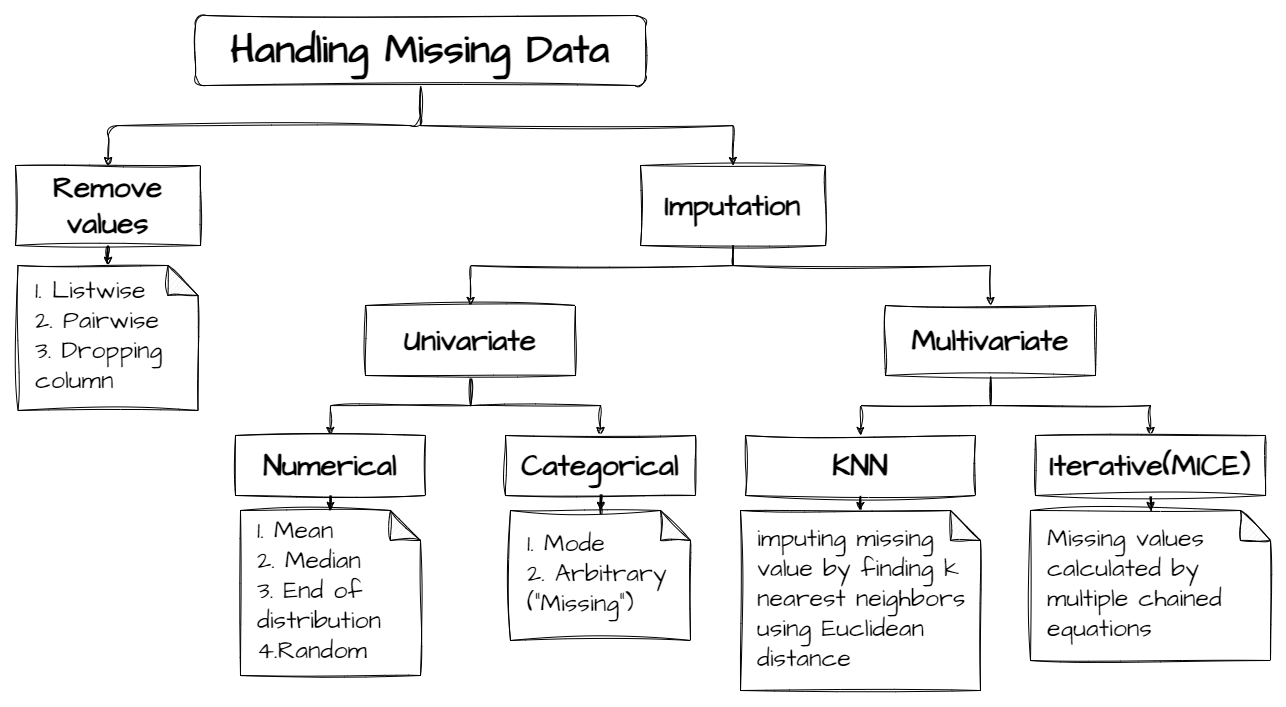

In [27]:
data = df.copy()

In [28]:
# Drop any row with ≥1 missing
df_clean = df.dropna()



In [29]:
# Drop only if a particular column is missing
df_clean = df.dropna(subset=['Marks', 'Admission'])

In [30]:
df_clean.isnull().sum()

,0
Gender,6
City,7
Marks,0
Subject,7
Admission,0


In [31]:
df_clean.isnull().sum()

,0
Gender,6
City,7
Marks,0
Subject,7
Admission,0


# Simple Imputation
2.1 Constant / “Flag” Imputation
– Replace missings with a placeholder (e.g. "Unknown" or -1)
– Keeps row count intact and signals “missing” explicitly

In [32]:
df['City'    ].fillna('no', inplace=True)
#df['Marks'   ].fillna(-1, inplace=True)


/tmp/ipython-input-46576991.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['City'    ].fillna('no', inplace=True)


In [33]:
df['City'].isna().sum()

np.int64(0)

In [34]:
df.isnull().sum()

,0
Gender,7
City,0
Marks,7
Subject,7
Admission,7


#  Mean / Median / Mode Imputation
– Numeric → use the column’s mean or median

– Categorical → use the mode

In [38]:
# Numeric
df['Marks'].fillna(df['Marks'].mean(), inplace=True)

# Categorical
# df['Gender']= df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)


/tmp/ipython-input-938759457.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Marks'].fillna(df['Marks'].mean(), inplace=True)


In [37]:
df['Marks'].isna().sum()

np.int64(0)

# 3. Forward/Backward Fill (Time‑Series or Ordered Data)
– Carries last non‑null value forward (ffill) or next backward (bfill)

– Useful when rows have a natural order (e.g. measurements over time)

In [39]:
df.sort_index(inplace=True)
df['Marks'].ffill(inplace=True)   # or df['Marks'].bfill()


/tmp/ipython-input-853440626.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Marks'].ffill(inplace=True)   # or df['Marks'].bfill()


# 4. Interpolation
– Fits a simple curve between known points to fill numeric gaps

– Options: linear, polynomial, spline, etc.

# 5. K‑Nearest Neighbors (KNN) Imputation
– Finds “neighbors” in feature‑space and imputes the average (numeric) or mode (categorical)


– Captures local structure better than global mean/median

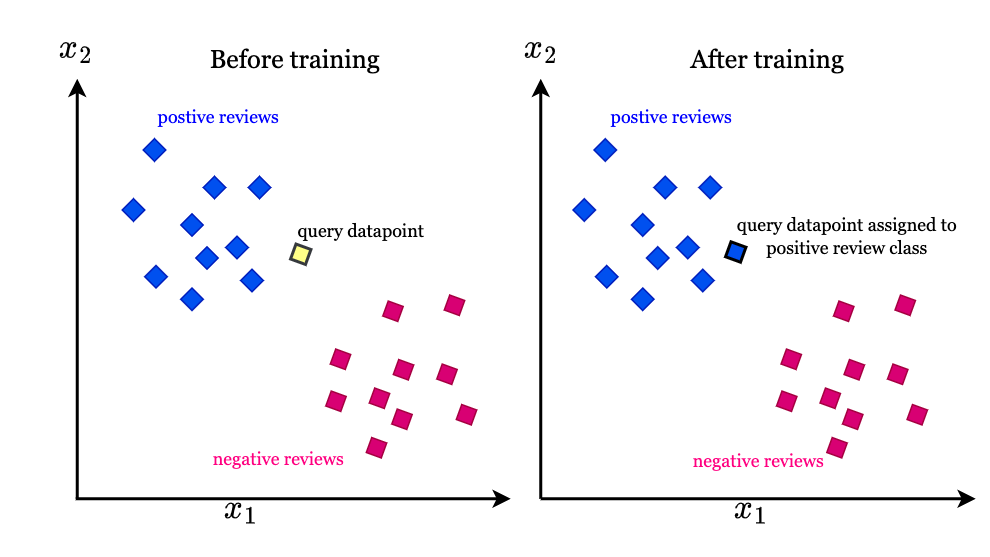

In [40]:
from sklearn.impute import KNNImputer
imp = KNNImputer(n_neighbors=5)
df_numeric = pd.DataFrame(imp.fit_transform(df[['Marks']]), columns=['Marks'])


# 6. Dropping Columns
If a column has too much missing data (e.g. >50–60%), it may be safer to drop it completely:

In [41]:
threshold = 0.4 * len(df)
if 'Subject' in df.columns and df['Subject'].count() < threshold:
    df.drop(columns=['Subject'], inplace=True)

# **Task**  

### 📋 Objectives  
1. **Data Preprocessing**  
   - Clean and prepare your dataset.  
   - Handle missing values, normalize and scale features, and remove outliers.    

### 🔎 Working  
1. **Select a tabular dataset** of at least 200 rows and 5 columns (can be your own or from an open source).  
2. **Create a Jupyter Notebook** that:  
   - Loads the data.  
   - Performs **preprocessing**:  
     - Impute or drop missing values.  
     

In [81]:
import pandas as pd
import numpy as np

In [82]:
np.random.seed(42)

data = {
    "Age": np.random.randint(18, 60, 220),
    "Salary": np.random.randint(20000, 120000, 220),
    "Experience": np.random.randint(0, 40, 220),
    "Gender": np.random.choice(["Male", "Female"], 220),
    "Department": np.random.choice(["IT", "HR", "Finance", "Marketing"], 220)
}

df = pd.DataFrame(data)
df.head()

,Age,Salary,Experience,Gender,Department
0,56,31411,33,Female,HR
1,46,22911,31,Female,IT
2,32,87270,24,Female,IT
3,25,103763,39,Female,IT
4,38,28680,0,Female,Marketing


In [83]:
df.loc[np.random.choice(df.index, 20), "Salary"] = np.nan
df.loc[np.random.choice(df.index, 15), "Age"] = np.nan
df.loc[np.random.choice(df.index, 10), "Gender"] = np.nan

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         206 non-null    float64
 1   Salary      200 non-null    float64
 2   Experience  220 non-null    int64  
 3   Gender      211 non-null    object 
 4   Department  220 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 8.7+ KB


In [85]:
df.isnull().sum()

,0
Age,14
Salary,20
Experience,0
Gender,9
Department,0


In [86]:
df["Age"].fillna(df["Age"].mean(), inplace=True)
df["Salary"].fillna(df["Salary"].mean(), inplace=True)

/tmp/ipython-input-3327833700.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].mean(), inplace=True)
/tmp/ipython-input-3327833700.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [87]:
df["Gender"].fillna(df["Gender"].mode()[0], inplace=True)

/tmp/ipython-input-2063836454.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Gender"].fillna(df["Gender"].mode()[0], inplace=True)


In [88]:
df.isnull().sum()

,0
Age,0
Salary,0
Experience,0
Gender,0
Department,0


#**Self Practice Questions**

**Dataset**

In [58]:
import pandas as pd
import numpy as np
import warnings

data = {
    'Name'      : ['Ali', 'Sara', 'Ahmed', 'Sara', None],
    'Gender'    : ['Male', 'Female', None, 'Female', 'Male'],
    'City'      : ['Lahore', 'Karachi', 'Lahore', None, 'Karachi'],
    'Marks'     : [85, 92, None, 92, 150],
    'Admission' : ['Yes', 'Yes', 'No', None, 'Yes']
}

df = pd.DataFrame(data)
df

,Name,Gender,City,Marks,Admission
0,Ali,Male,Lahore,85.0,Yes
1,Sara,Female,Karachi,92.0,Yes
2,Ahmed,None,Lahore,NaN,No
3,Sara,Female,None,92.0,None
4,None,Male,Karachi,150.0,Yes


1. Series vs DataFrame Confusion

In [59]:
print(type(df['Marks'])) #single bracket series
print(type(df[['Marks']])) #double bracket dataframe

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


2. Conditional Selection with NaN

In [60]:
df[df['Marks'] > 90]

,Name,Gender,City,Marks,Admission
1,Sara,Female,Karachi,92.0,Yes
3,Sara,Female,None,92.0,None
4,None,Male,Karachi,150.0,Yes


3. Boolean Mask Length Trap

In [61]:
df[[True, False, True, False, True]] # each boolean value will matches wih each row and if true display row otherwise not

,Name,Gender,City,Marks,Admission
0,Ali,Male,Lahore,85.0,Yes
2,Ahmed,None,Lahore,NaN,No
4,None,Male,Karachi,150.0,Yes


4. Mode for categorical data

In [65]:
print(df['Gender'].mode()) # print the most fequent values
print(df['Gender'].mode()[0]) # select the first value from the mode Series
print(df['Gender'].mode()[1]) # select the second value from the mode Series

0    Female
1      Male
Name: Gender, dtype: object
Female
Male


5. Sorting with NaN

In [68]:
df.sort_values(by='Marks') #arrange the values according to marks column, all NaNs will got at last

,Name,Gender,City,Marks,Admission
0,Ali,Male,Lahore,85.0,Yes
1,Sara,Female,Karachi,92.0,Yes
3,Sara,Female,None,92.0,None
4,None,Male,Karachi,150.0,Yes
2,Ahmed,None,Lahore,NaN,No


6. Counts the values of a column value_counts Trap

In [70]:
df['City'].value_counts() # it doesn't count NaNs

,count
City,
Lahore,2
Karachi,2
